# Ch08_3.서포트 벡터 머신(SVM)

## 1.기본 package 설정

In [1]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

## 3.데이터 전처리
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화
from sklearn.preprocessing import LabelEncoder # 범주형 변수 수치화

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split 

## 5.분류모델구축 (3장.p.83~130)
# from sklearn.tree import DecisionTreeClassifier # 결정 트리
# from sklearn.naive_bayes import GaussianNB # 나이브 베이즈
# from sklearn.neighbors import KNeighborsClassifier # K-최근접 이웃
# from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
# from sklearn.ensemble import BaggingClassifier # 앙상블
# from sklearn.linear_model import Perceptron # 퍼셉트론
# from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from sklearn.svm import SVC # 서포트 벡터 머신(SVM)
# from sklearn.neural_network import MLPClassifier # 다층인공신경망

## 6.모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

## 7.최적화
from sklearn.model_selection import cross_validate # 교차타당도
from sklearn.pipeline import make_pipeline # 파이프라인 구축
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝

## 2.데이터 가져오기

### 2.1 데이터프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [2]:
accidents_df = pd.read_csv('accidentsnn.csv')
accidents_df.head()

,ALCHL_I,PROFIL_I_R,SUR_COND,VEH_INVL,MAX_SEV_IR
0,2,0,1,1,0
1,2,1,1,1,2
2,1,0,1,1,0
3,2,0,2,2,1
4,2,1,1,2,1


- 자료구조 살펴보기

In [3]:
accidents_df.shape

(999, 5)

In [4]:
# 자료구조 살펴보기
accidents_df.keys()

Index(['ALCHL_I', 'PROFIL_I_R', 'SUR_COND', 'VEH_INVL', 'MAX_SEV_IR'], dtype='object')

### 2.2 data와 target으로 분리
- 필요한 데이터만 추출
- data: X, target: y 로 분리

In [5]:
X = accidents_df.drop (['MAX_SEV_IR'], axis=1)
X.head()

,ALCHL_I,PROFIL_I_R,SUR_COND,VEH_INVL
0,2,0,1,1
1,2,1,1,1
2,1,0,1,1
3,2,0,2,2
4,2,1,1,2


In [6]:
y = accidents_df['MAX_SEV_IR']
np.bincount(y)

array([551, 299, 149], dtype=int64)

## 3.데이터 전처리

- 문자형 자료를 숫자(범주형)로 인코딩 -> 범주형 변수를 가변수로 처리 : One Hot Encording
- 숫자형 자료를 표준화
- 단, 결정나무, 랜덤 포레스트, 나이브 베이즈 분류 : 원본데이터 그대로 유지

### 3.1 data(X) 수치형 데이터 표준화 
- X.keys()에서 index 키를 가져옴

In [7]:
stdsc = StandardScaler()
X.iloc[:,[3]] = stdsc.fit_transform(X.iloc[:,[3]])

In [8]:
X.head()

,ALCHL_I,PROFIL_I_R,SUR_COND,VEH_INVL
0,2,0,1,-0.517878
1,2,1,1,-0.517878
2,1,0,1,-0.517878
3,2,0,2,1.206655
4,2,1,1,1.206655


### 3.2 data(X) 레이블 인코딩
- 질변변수 가변수화
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [9]:
X['ALCHL_I'] = X['ALCHL_I'].replace ([1,2], ['Yes','No'])

In [10]:
X['PROFIL_I_R'] = X['PROFIL_I_R'].replace ([0,1], ['etc','level1'])

In [11]:
X['SUR_COND'] = X['SUR_COND'].replace ([1,2,3,9], ['dry','wet','snow','non'])

In [12]:
X.head()

,ALCHL_I,PROFIL_I_R,SUR_COND,VEH_INVL
0,No,etc,dry,-0.517878
1,No,level1,dry,-0.517878
2,Yes,etc,dry,-0.517878
3,No,etc,wet,1.206655
4,No,level1,dry,1.206655


In [13]:
X.keys()

Index(['ALCHL_I', 'PROFIL_I_R', 'SUR_COND', 'VEH_INVL'], dtype='object')

In [14]:
X = pd.get_dummies(X[['ALCHL_I', 'PROFIL_I_R', 'VEH_INVL', 'SUR_COND']],
                   columns=['ALCHL_I', 'PROFIL_I_R', 'SUR_COND'], 
                   drop_first=True)

In [15]:
X.head()

,VEH_INVL,ALCHL_I_Yes,PROFIL_I_R_level1,SUR_COND_dry,SUR_COND_non,SUR_COND_snow,SUR_COND_wet
0,-0.517878,0,0,1,0,0,0
1,-0.517878,0,1,1,0,0,0
2,-0.517878,1,0,1,0,0,0
3,1.206655,0,0,0,0,0,1
4,1.206655,0,1,1,0,0,0


### 3.3 Class(target) 레이블 인코딩
- class(y)가 숫자형으로 되어 있기 때문에 변환 없음

In [16]:
y

0      0
1      2
2      0
3      1
4      1
      ..
994    0
995    0
996    1
997    2
998    0
Name: MAX_SEV_IR, Length: 999, dtype: int64

## 4.훈련/검증용 데이터 분할
- test_size: 검증데이터 30%
- random_state : random seed 번호 = 1
- stratify : y(클래스)의 비율에 따라 분할

In [17]:
# \ 이후에 space 없어야 함
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, 
                         test_size=0.3, 
                         random_state=1, 
                         stratify=y)

## 5.모델구축

- kernel = linear 일때는 gamma는 사용 못함
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [18]:
svm = SVC(kernel='rbf', 
          random_state=1, 
          gamma=0.2, 
          C=1.0)


svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

## 6. 모델검정

### 6.1 검증용 데이터로 예측
- predict (class로 표시)
- predict_proba (확률값으로 표시)

In [19]:
y_pred = svm.predict(X_test)

### 6.2 정오분류표로 검정

- class label이 3개 이므로 추가

In [20]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]','True[2]'],
                      columns=['Predict[0]', 'Predict[1]','Predict[2]'])
confmat

,Predict[0],Predict[1],Predict[2]
True[0],160,0,5
True[1],0,90,0
True[2],14,23,8


In [21]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       165
           1       0.80      1.00      0.89        90
           2       0.62      0.18      0.28        45

    accuracy                           0.86       300
   macro avg       0.78      0.72      0.70       300
weighted avg       0.84      0.86      0.83       300



### 6.3 정확도, 민감도 확인
- 클래스가 2개일 경우에만 실행

In [22]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
# print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
# print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
# print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 42
정확도: 0.860


### 6.4 ROC 곡선 그리기
- 클래스가 2개일 경우에만 실행

## 7.최적화
- 교재 6장 (pp.218~250)

### 7.1 파이프라인 모델 만들기
- 파이프라인을 이용하여 최적 모델 만들기
- 기본모형은 아무 옵션이 없는 모델로 부터 시작
- 파라미터 옵션 확인: pipe_tree.get_params().keys()

In [23]:
pipe_svm = make_pipeline(SVC(random_state=1))

In [24]:
pipe_svm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'svc', 'svc__C', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

### 7.2 학습 곡선으로 편향과 분산 문제 분석하기
- 훈렴 샘플링 수를 이용하여 편향과 분산 검정
- 편향: 정확도가 높은지 검정
- 분산: 훈련/검정 데이터의 정확도의 차이가 적은지

C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

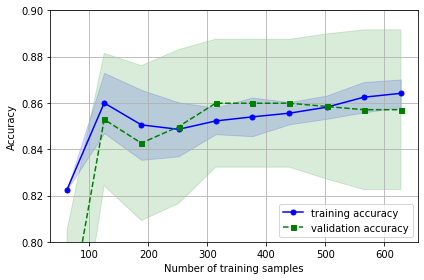

In [25]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_svm, # 수정
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 0.9])  # 수정
plt.tight_layout()
plt.show()

### 7.3 검증 곡선으로 과대적합과 과소적합 조사하기
- 과대적합 : 파라미터가 많음 -> 파라미터 축소
- 과소적합 : 파라미터가 적음 -> 파라미터 추가

C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

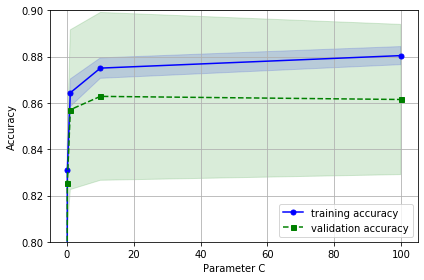

In [26]:
param_range = [0.01, 0.1, 1.0, 10, 100]  # 수정

train_scores, test_scores = validation_curve(
                estimator=pipe_svm, # 수정
                X=X_train, 
                y=y_train, 
                param_name='svc__C', ## 수정
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of C') # 수정
plt.legend(loc='lower right')
plt.xlabel('Parameter C') # 수정
plt.ylabel('Accuracy')
plt.ylim([0.8, 0.9])  # 수정
plt.tight_layout()
plt.show()

### 7.4 하이퍼파라미터 튜닝
- 그리드 서치를 사용한 머신 러닝 모델 세부 튜닝
- 기계학습 모델의 성능을 결정하는 하이퍼 파라미터 튜닝

In [27]:
param_range = [0.01, 0.1, 1.0, 10, 100]  # 수정

param_grid = [{'svc__C': param_range, # 수정
               'svc__gamma': param_range, # 수정
               'svc__kernel': ['rbf']}] # 수정

gs = GridSearchCV(estimator=pipe_svm, # 수정
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.8683834048640916
{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 8.최적화 모델 검정
- 최적모델을 이용해 검정 데이터(full data) 최종 확인
- best_tree 로 모델명 변경

In [28]:
best_svm = gs.best_estimator_
best_svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('svc',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

- 검증용 데이터로 예측

In [29]:
y_pred = best_svm.predict(X_test) 

- 정오분류표로 검정

In [30]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]','True[2]'],
                      columns=['Predict[0]', 'Predict[1]','Predict[2]'])
confmat

,Predict[0],Predict[1],Predict[2]
True[0],160,0,5
True[1],0,88,2
True[2],14,19,12


In [31]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       165
           1       0.82      0.98      0.89        90
           2       0.63      0.27      0.38        45

    accuracy                           0.87       300
   macro avg       0.79      0.74      0.74       300
weighted avg       0.85      0.87      0.84       300



- 정확도, 민감도 확인

In [32]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
# print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
# print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
# print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 40
정확도: 0.867
